<a href="https://colab.research.google.com/github/ADI2705/2021BIT038/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aadityasinghal/facial-expression-dataset")

print("Path to dataset files:", path)

100%|██████████| 60.7M/60.7M [00:01<00:00, 46.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aadityasinghal/facial-expression-dataset/versions/1


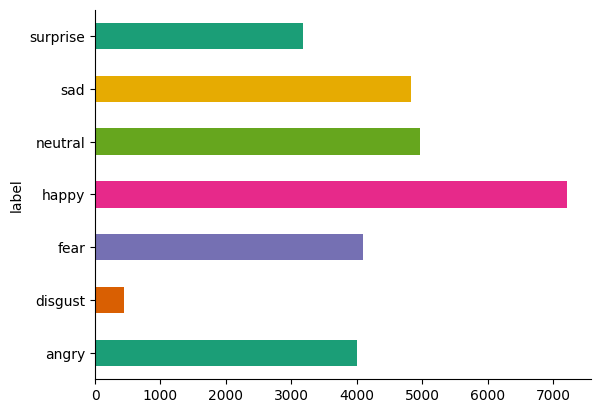

In [12]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
import os
import pandas as pd

def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue  # Skip files that aren't directories
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

# Define dataset paths
TRAIN_DIR = "/root/.cache/kagglehub/datasets/aadityasinghal/facial-expression-dataset/versions/1/train/train"
TEST_DIR = "/root/.cache/kagglehub/datasets/aadityasinghal/facial-expression-dataset/versions/1/test/test"

# Convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()


angry Completed
neutral Completed
happy Completed
fear Completed
surprise Completed
disgust Completed
sad Completed


,image,label
0,/root/.cache/kagglehub/datasets/aadityasinghal...,happy
1,/root/.cache/kagglehub/datasets/aadityasinghal...,happy
2,/root/.cache/kagglehub/datasets/aadityasinghal...,angry
3,/root/.cache/kagglehub/datasets/aadityasinghal...,angry
4,/root/.cache/kagglehub/datasets/aadityasinghal...,angry


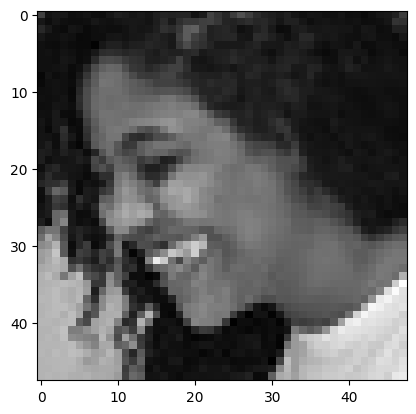

In [13]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

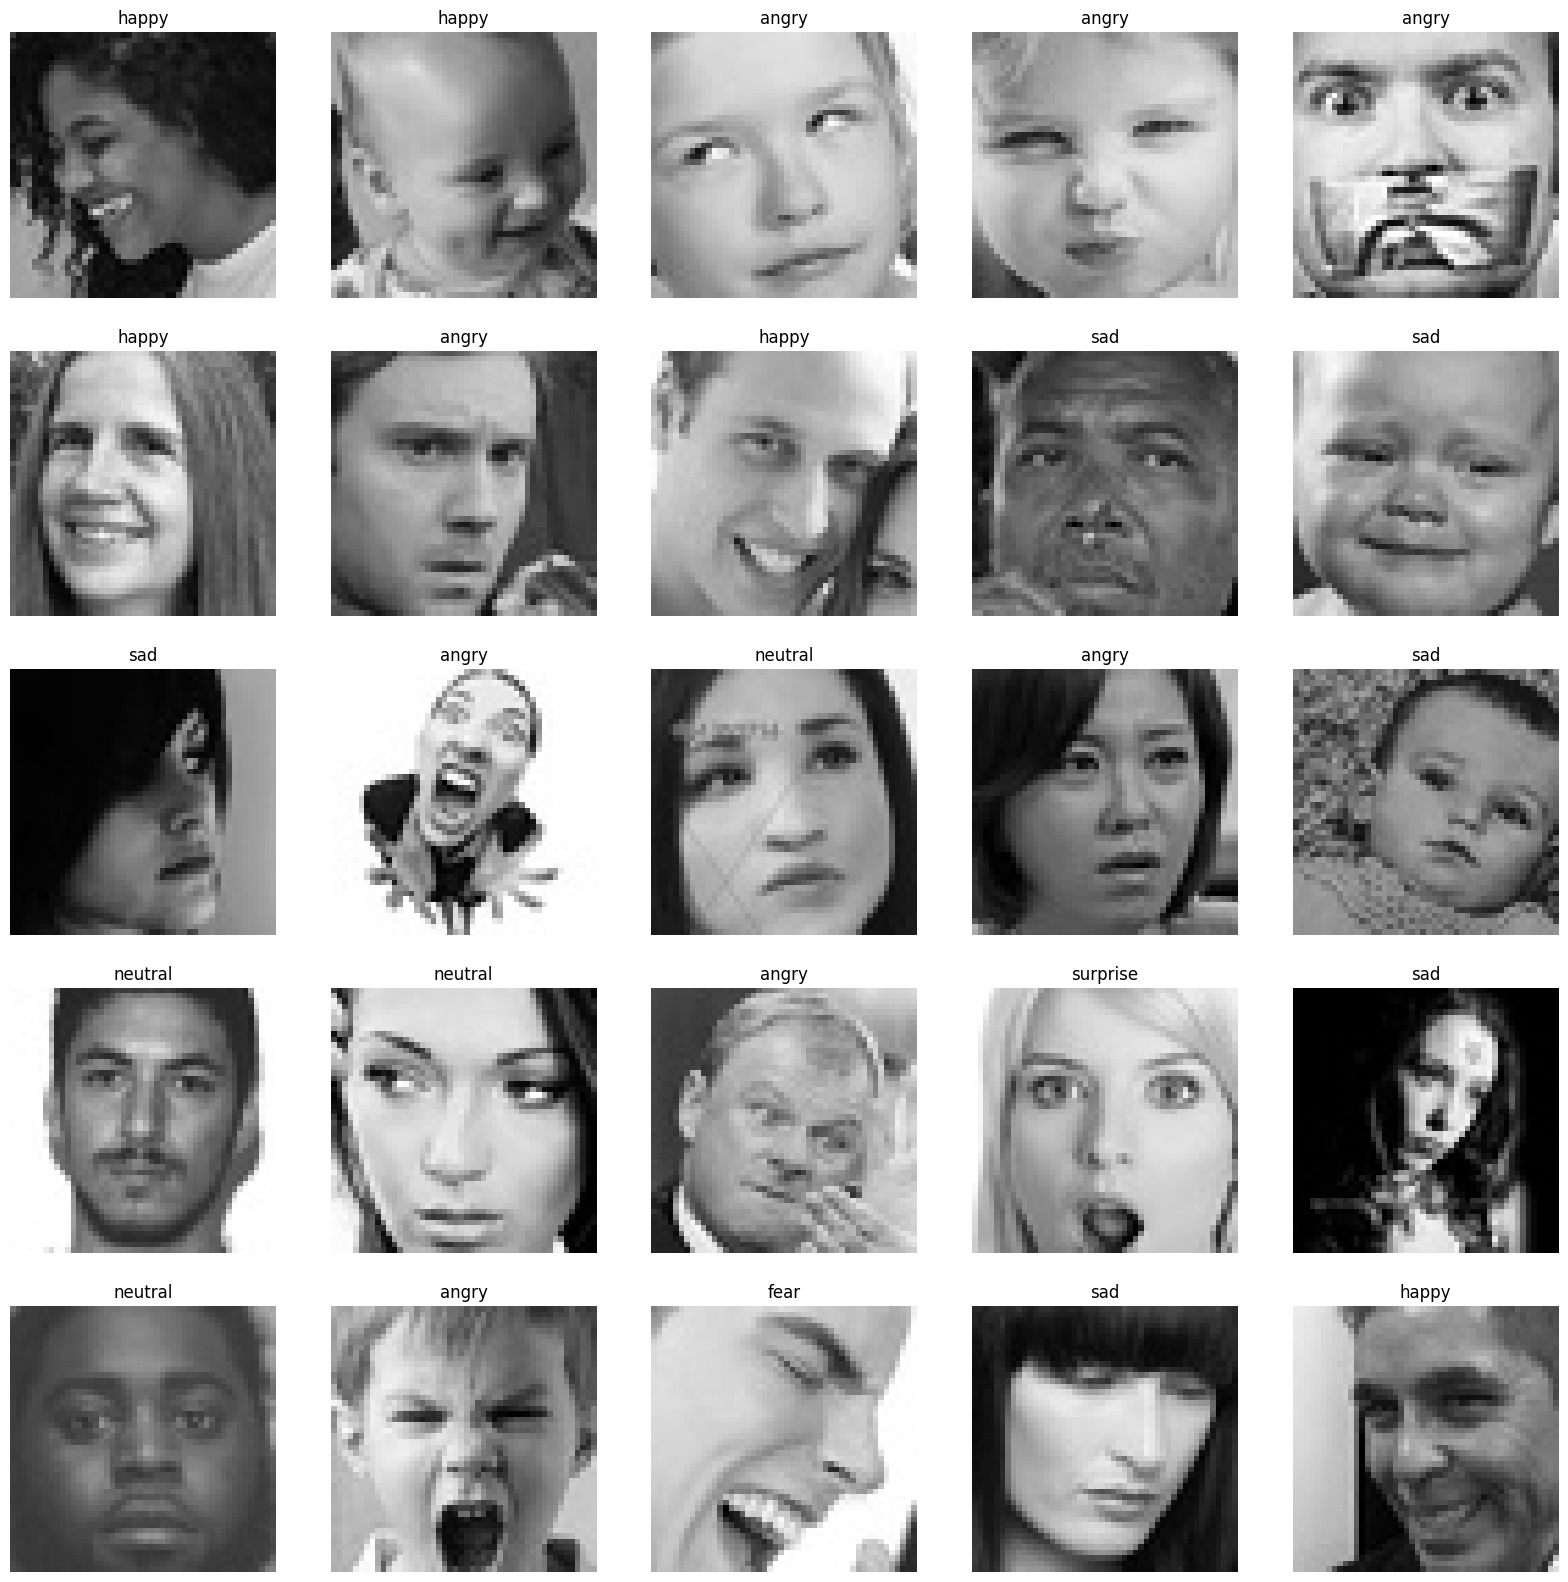

In [14]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [20]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Corrected argument
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Ensure correct shape
    return features

train_features = extract_features(train['image'])


100%|██████████| 28709/28709 [00:05<00:00, 5067.09it/s]


In [21]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:01<00:00, 6141.07it/s]


In [22]:
x_train = train_features/255.0
x_test = test_features/255.0

In [28]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


In [29]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [31]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [33]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(x=x_train, y=y_train, batch_size=512, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.2309 - loss: 1.8456 - val_accuracy: 0.2471 - val_loss: 1.8198
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.2510 - loss: 1.8205 - val_accuracy: 0.2471 - val_loss: 1.8145
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.2507 - loss: 1.8119 - val_accuracy: 0.2456 - val_loss: 1.8011
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.2523 - loss: 1.7958 - val_accuracy: 0.2526 - val_loss: 1.7761
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.2658 - loss: 1.7612 - val_accuracy: 0.3140 - val_loss: 1.6734
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.3183 - loss: 1.6851 - val_accuracy: 0.3479 - val_loss: 1.6493
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.3761 - loss: 1.5950 - val_accuracy: 0.4356 - val_loss: 1.4418
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.4239 - loss: 1.4792 - v

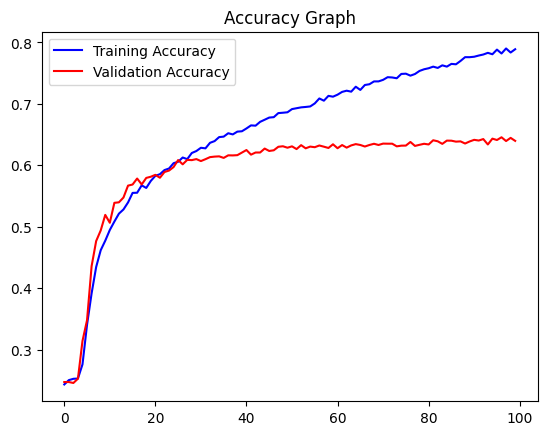

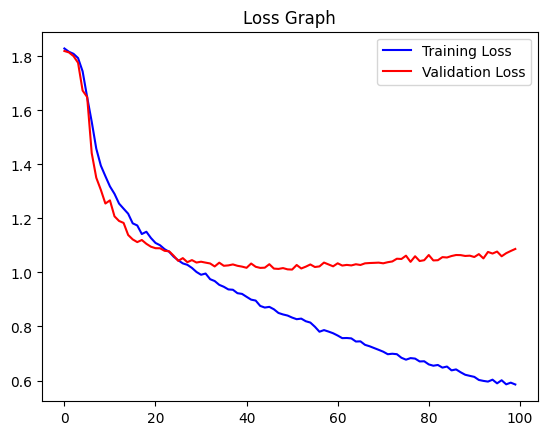

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()


Original Output: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
Predicted Output: surprise


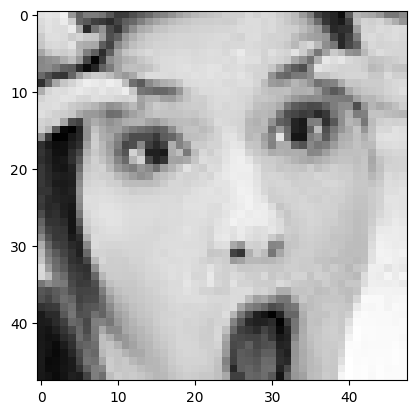

In [37]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Output: happy


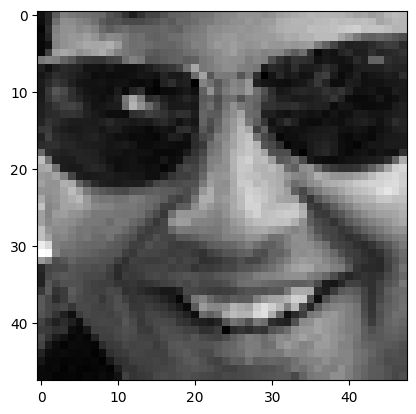

In [38]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Output: fear


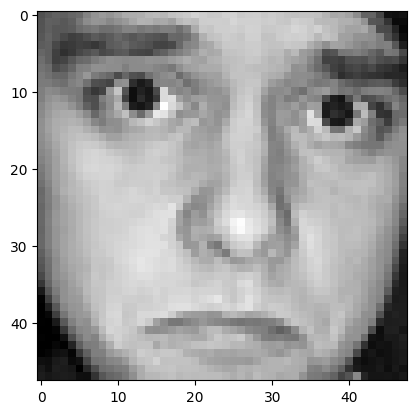

In [39]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

              precision    recall  f1-score   support

       angry       0.59      0.49      0.53       958
     disgust       0.82      0.59      0.69       111
        fear       0.55      0.42      0.48      1024
       happy       0.82      0.83      0.83      1774
     neutral       0.53      0.67      0.59      1233
         sad       0.50      0.55      0.52      1247
    surprise       0.80      0.79      0.79       831

    accuracy                           0.64      7178
   macro avg       0.66      0.62      0.63      7178
weighted avg       0.64      0.64      0.64      7178



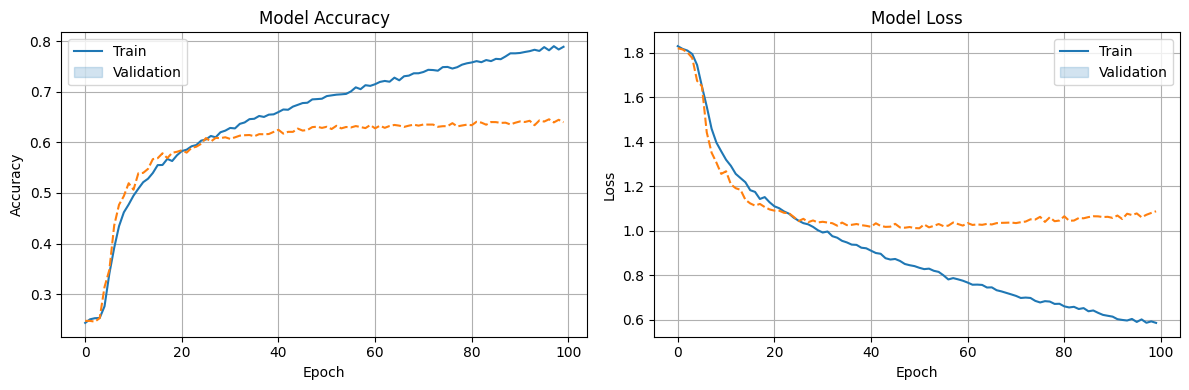

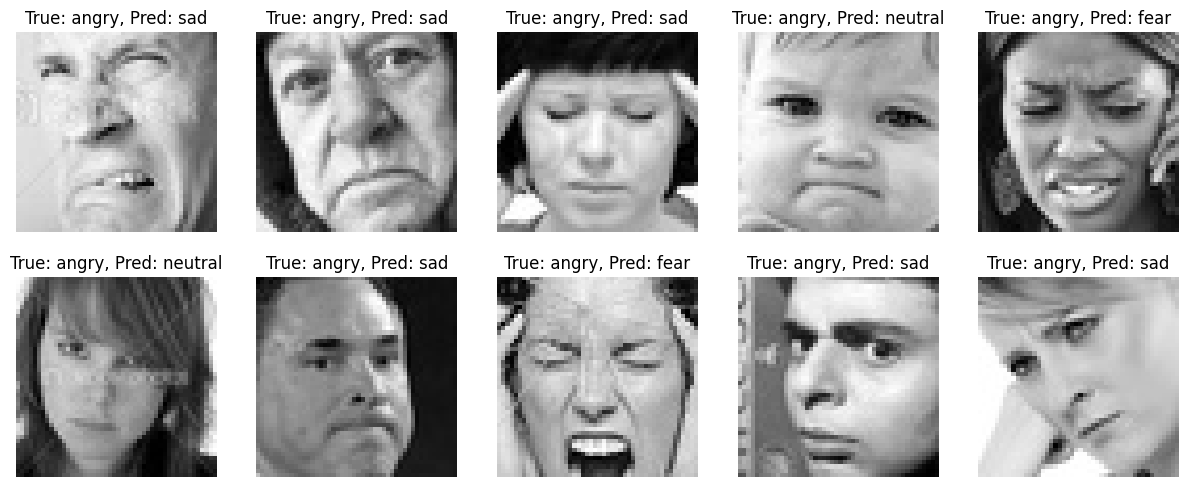

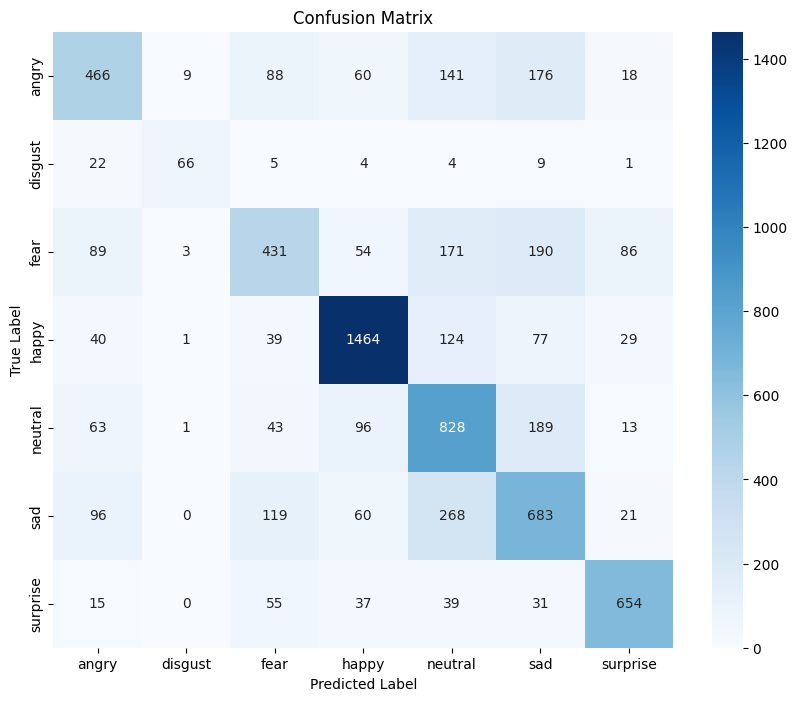

Accuracy for angry: 0.486
Accuracy for disgust: 0.595
Accuracy for fear: 0.421
Accuracy for happy: 0.825
Accuracy for neutral: 0.672
Accuracy for sad: 0.548
Accuracy for surprise: 0.787


In [41]:
# prompt: more plots visualization to understand model working performace etc anything you think that can give more insight on model

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

# ... (Your existing code) ...

# More detailed classification report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


# Learning curves with more detail
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()


# Function to plot misclassified images
def plot_misclassified(x_test, y_true, y_pred_classes, le, num_images=10):
    misclassified_indices = np.where(y_true != y_pred_classes)[0]
    num_misclassified = min(num_images, len(misclassified_indices))

    plt.figure(figsize=(15, 3 * (num_misclassified // 5 + 1)))

    for i in range(num_misclassified):
        index = misclassified_indices[i]
        plt.subplot(num_misclassified // 5 + 1, 5, i + 1)
        plt.imshow(x_test[index].reshape(48, 48), cmap='gray')
        plt.title(f"True: {le.classes_[y_true[index]]}, Pred: {le.classes_[y_pred_classes[index]]}")
        plt.axis('off')
    plt.show()

plot_misclassified(x_test, y_true, y_pred_classes, le)


# Analyze per-class performance from the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Individual class accuracy
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
for i, label in enumerate(le.classes_):
    print(f"Accuracy for {label}: {class_accuracy[i]:.3f}")

In [42]:
# prompt: now give code to convert it into a portable model like .h5/pkl etc

model.save('facial_expression_model.h5')

In [56]:
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2

# Load pre-trained model (use your model file)
model = tf.keras.models.load_model('/content/facial_expression_model.h5')

# Define emotion labels (replace with your model's labels if different)
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to preprocess the uploaded image
def preprocess_image(img):
    img = img.resize((48, 48))  # Resize image to 48x48 pixels for the model input
    img = np.array(img)  # Convert image to numpy array
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    img = img.astype('float32') / 255  # Normalize image
    img = np.reshape(img, (1, 48, 48, 1))  # Reshape for the model
    return img

# Streamlit app layout
st.title("Facial Expression Recognition")

# Add a description
st.markdown("""
This app predicts the emotion displayed on a face. Upload an image, and the model will predict the facial expression.
""")

# Upload image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display uploaded image in a more structured way
    col1, col2 = st.columns([1, 1])
    with col1:
        img = Image.open(uploaded_file)
        st.image(img, caption="Uploaded Image", use_column_width=True)

    with col2:
        st.markdown("### Prediction")
        processed_img = preprocess_image(img)
        prediction = model.predict(processed_img)
        emotion_index = np.argmax(prediction)
        emotion = emotion_labels[emotion_index]

        # Display the prediction with style
        st.write(f"**Predicted emotion:** {emotion}")

        # Use a colored box for feedback
        if emotion == "Happy":
            st.success("The person is happy!")
        elif emotion == "Sad":
            st.warning("The person is sad.")
        else:
            st.info(f"The person seems to be feeling {emotion}.")

    # Add additional styling or features as needed
    st.markdown("---")
    st.write("Try uploading different images to see how the model predicts various emotions!")


2024-12-03 23:28:52.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 23:28:52.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 23:28:52.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 23:28:52.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 23:28:52.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 23:28:52.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 23:28:52.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 23:28:52.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [58]:
from pyngrok import ngrok

# Start the Streamlit app in the background
!streamlit run app.py &>/dev/null &

# Set up ngrok to expose the Streamlit app
public_url = ngrok.connect(8501)  # ngrok automatically uses the default port (8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://17e9-34-83-196-16.ngrok-free.app" -> "http://localhost:8501"
